# Feature Engineering + Machine Learning

## 0 - Imports libraries and dataframe

In [1]:
%config Completer.use_jedi = False 


# Lbraries imports

# Data manipulation

import numpy as np
import pandas as pd

# Visualization 

import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Train Test Split

from sklearn.model_selection import train_test_split

# Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Preprocessing

from sklearn.preprocessing import StandardScaler

#Hyperparameters optimization

from sklearn.model_selection import GridSearchCV

# Save model for deployment

import pickle

# Auxiliar fast linear regression

from scipy.stats import linregress


In [2]:
pd.set_option('display.max_columns', 20, 'display.max_rows',30)

df = pd.read_csv('Data/windProject_4ML.csv')
df['slice dt iso'] = pd.to_datetime(df['slice dt iso'])

df

,slice dt iso,lat,lon,temperature,dew_point,pressure,humidity,clouds,wind_speed,wind_deg,...,Direction N-S,Direction E-W,Tarifa_WindGust,Tarifa_Wind,Tarifa_WindDirection,Tarifa_Direction N-S,Tarifa_Direction E-W,delta_Wind,delta_N-S,delta_E-W
0,2019-02-16 09:00:00,36.013158,-5.598892,13.79,11.13,1021.601,83.994,100.0,25.963871,95.202,...,-0.090667,0.995881,35.118709,17.624149,72.0,0.309017,0.951057,-8.339722,0.399684,-0.044825
1,2019-02-16 12:00:00,36.013158,-5.598892,13.81,11.16,1022.066,84.064,96.0,25.437090,93.856,...,-0.067249,0.997736,35.053915,21.835803,86.0,0.069756,0.997564,-3.601288,0.137006,-0.000172
2,2019-02-16 15:00:00,36.013158,-5.598892,13.82,11.15,1020.887,83.926,92.0,23.938390,93.883,...,-0.067719,0.997704,34.859531,20.539909,82.0,0.139173,0.990268,-3.398480,0.206892,-0.007436
3,2019-02-16 18:00:00,36.013158,-5.598892,13.77,11.27,1020.964,84.583,94.0,19.924360,95.812,...,-0.101265,0.994860,35.766656,23.326080,87.0,0.052336,0.998630,3.401720,0.153601,0.003770
4,2019-02-16 21:00:00,36.013158,-5.598892,13.74,11.24,1022.636,84.845,88.0,16.271885,94.213,...,-0.073464,0.997298,NaN,NaN,83.0,0.121869,0.992546,NaN,0.195334,-0.004752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,2021-05-19 09:00:00,36.013158,-5.598892,23.05,12.91,1018.467,52.600,41.9,1.315980,231.962,...,-0.616184,-0.787602,6.933029,3.239733,249.0,-0.358368,-0.933580,1.923754,0.257816,-0.145978
6342,2021-05-19 12:00:00,36.013158,-5.598892,24.45,11.55,1018.233,44.200,28.7,4.089839,78.455,...,0.200138,0.979768,20.215936,12.829344,102.0,-0.207912,0.978148,8.739505,-0.408049,-0.001620
6343,2021-05-19 15:00:00,36.013158,-5.598892,22.65,12.45,1018.215,52.500,25.3,11.151810,68.753,...,0.362389,0.932027,28.768832,17.948123,74.0,0.275637,0.961262,6.796313,-0.086752,0.029235
6344,2021-05-19 18:00:00,36.013158,-5.598892,19.66,16.55,1018.845,82.600,21.5,11.254834,61.292,...,0.480346,0.877079,27.861707,17.818533,72.0,0.309017,0.951057,6.563700,-0.171329,0.073977


## 1 - NaN/Nulls Values Treatment

Just one last step now that we have dropped few columns that are not interesed or can prvoce noise in our project,we can do a small paragraph and handle NaN / Null values before starting with machine learning 

In [3]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                  793
wind_speed                0
wind_deg                  0
rain                    120
convective              793
Direction N-S             0
Direction E-W             0
Tarifa_WindGust          29
Tarifa_Wind              19
Tarifa_WindDirection     17
Tarifa_Direction N-S     17
Tarifa_Direction E-W     17
delta_Wind               19
delta_N-S                17
delta_E-W                17
dtype: int64

### 1.1 - Measured wind speed

In [4]:
df[df['Tarifa_Wind'].isna()==True].index

Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22,
            23],
           dtype='int64')

**Strategy:**

- Tarifa Wind NaN - This is the meassurement for the weather station, they are consecutive registers, probably due to a problem in the station. If they were distributed we couuld filled them with the forecast wind, but cause they are all consecutive and in a two days period, giving them an aritifical value just give us more artificial accuracy in the artificial model. Also they are 19 cases out of 6346 (0.2%) so we opt for delleting all the registers for that two days. 

In [5]:
df.dropna(subset=['Tarifa_Wind'], inplace=True)
df.reset_index(drop=True, inplace=True)

### 1.2 - Measured wind direction

In [6]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                  790
wind_speed                0
wind_deg                  0
rain                    117
convective              790
Direction N-S             0
Direction E-W             0
Tarifa_WindGust          10
Tarifa_Wind               0
Tarifa_WindDirection     11
Tarifa_Direction N-S     11
Tarifa_Direction E-W     11
delta_Wind                0
delta_N-S                11
delta_E-W                11
dtype: int64

In [7]:
df[df['Tarifa_WindDirection'].isna()==True].index

Int64Index([6, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271], dtype='int64')

In [8]:
df[df['Tarifa_WindGust'].isna()==True].index

Int64Index([3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271], dtype='int64')

In [9]:
print('mean value: ', (df['wind_deg']-df['Tarifa_WindDirection']).mean())

mean value:  -2.08994268524383


**Strategy: 

- Tarifa Wind direction (and artifical created variables N/S E/O and compass) : The mean deviation between the forecasted wind direction and the measured wind direction is just -2.089º (2.89º/360º => 0,8% mean error) and there is just 11 NaN values (11/6330 --> 0,1% of the registers) 

- We can then approxiamte the measured wind missings with the forecasteda wind values commiting a minimal error.  

In [10]:
df['Tarifa_WindDirection'].fillna(df['wind_deg'], inplace=True)
df['Tarifa_Direction N-S'].fillna(df['Direction N-S'], inplace=True)
df['Tarifa_Direction E-W'].fillna(df['Direction E-W'], inplace=True)

In [11]:
df['delta_Wind'] = df['Tarifa_Wind']-df['wind_speed']
df['delta_N-S'] = df['Tarifa_Direction N-S'] - df['Direction N-S'] 
df['delta_E-W'] = df['Tarifa_Direction E-W'] - df['Direction E-W']

In [12]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                  790
wind_speed                0
wind_deg                  0
rain                    117
convective              790
Direction N-S             0
Direction E-W             0
Tarifa_WindGust          10
Tarifa_Wind               0
Tarifa_WindDirection      0
Tarifa_Direction N-S      0
Tarifa_Direction E-W      0
delta_Wind                0
delta_N-S                 0
delta_E-W                 0
dtype: int64

### 1.3 - Meassured wind gust 

* **Strategy:** has a strong linear relation with wind, then we do a fast linear regression to fill the missing values based on the linear regression.

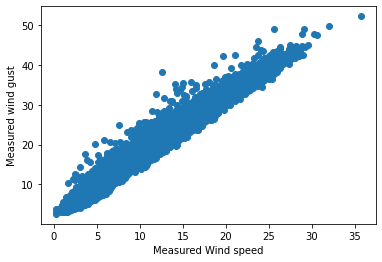

In [13]:
plt.scatter(y = df['Tarifa_WindGust'],x = df['Tarifa_Wind']);
plt.xlabel('Measured Wind speed'); plt.ylabel('Measured wind gust'); 

In [14]:
linregress(df.dropna()['Tarifa_Wind'], df.dropna()['Tarifa_WindGust'])

LinregressResult(slope=1.5001229469033874, intercept=2.3636408838850116, rvalue=0.9811683750312546, pvalue=0.0, stderr=0.00397266975692729, intercept_stderr=0.0516284266586672)

In [15]:
df['Tarifa_WindGust'].fillna(df['Tarifa_Wind']*1.5+2.36, inplace=True)

In [16]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                  790
wind_speed                0
wind_deg                  0
rain                    117
convective              790
Direction N-S             0
Direction E-W             0
Tarifa_WindGust           0
Tarifa_Wind               0
Tarifa_WindDirection      0
Tarifa_Direction N-S      0
Tarifa_Direction E-W      0
delta_Wind                0
delta_N-S                 0
delta_E-W                 0
dtype: int64

### 1.4 - Forecasted rain

In [17]:
mask = df['rain'].isna()
df[mask]

,slice dt iso,lat,lon,temperature,dew_point,pressure,humidity,clouds,wind_speed,wind_deg,...,Direction N-S,Direction E-W,Tarifa_WindGust,Tarifa_Wind,Tarifa_WindDirection,Tarifa_Direction N-S,Tarifa_Direction E-W,delta_Wind,delta_N-S,delta_E-W
10,2019-02-20,36.013158,-5.598892,12.54,10.52,1021.143,87.831,NaN,8.564559,78.387,...,0.201300,0.979530,24.492384,15.421131,87.0,0.052336,0.998630,6.856572,-0.148964,0.019100
18,2019-02-21,36.013158,-5.598892,12.99,11.06,1024.057,88.100,NaN,15.274695,82.085,...,0.137704,0.990473,32.915691,20.539909,77.0,0.224951,0.974370,5.265215,0.087247,-0.016103
26,2019-02-22,36.013158,-5.598892,12.71,11.02,1029.674,89.551,NaN,14.932579,78.999,...,0.190826,0.981624,30.971851,18.725659,74.0,0.275637,0.961262,3.793080,0.084811,-0.020362
34,2019-02-23,36.013158,-5.598892,12.22,10.06,1029.572,86.651,NaN,6.756788,81.364,...,0.150157,0.988662,23.002107,14.125237,76.0,0.241922,0.970296,7.368449,0.091765,-0.018367
42,2019-02-24,36.013158,-5.598892,13.71,8.22,1026.179,69.222,NaN,3.491137,271.500,...,0.026177,-0.999657,4.017269,1.943840,23.0,0.920505,0.390731,-1.547297,0.894328,1.390388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,2019-06-12,36.013158,-5.598892,16.65,14.45,1010.989,86.700,NaN,7.956137,250.060,...,-0.341036,-0.940050,9.006459,4.730011,290.0,0.342020,-0.939693,-3.226126,0.683056,0.000358
914,2019-06-14,36.013158,-5.598892,17.13,13.85,1014.610,80.800,NaN,9.779459,247.008,...,-0.390603,-0.920559,18.531275,11.922219,228.0,-0.669131,-0.743145,2.142760,-0.278528,0.177415
922,2019-06-15,36.013158,-5.598892,15.15,11.55,1019.531,79.700,NaN,10.955482,278.551,...,0.148690,-0.988884,10.043173,5.831520,315.0,0.707107,-0.707107,-5.123962,0.558417,0.281777
930,2019-06-16,36.013158,-5.598892,15.95,12.17,1017.110,77.800,NaN,6.080332,265.343,...,-0.081191,-0.996699,6.868235,3.110144,261.0,-0.156434,-0.987688,-2.970188,-0.075244,0.009010


median:  0.0 
mean : 0.21884959742351004
percentage of 3h slice without rain 77.9 %



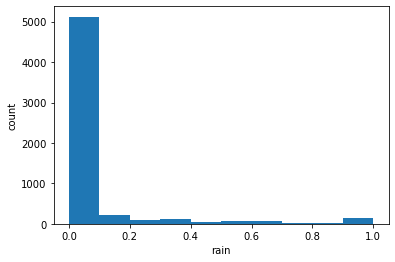

In [18]:
plt.hist(df['rain'], bins=10, range = (0,1));
plt.xlabel('rain');
plt.ylabel('count')
print("median: " , df['rain'].median(),"\nmean :", df['rain'].mean())
print("percentage of 3h slice without rain", round (df[df['rain']==0]['rain'].count()/len(df)*100,1) , "%\n")

- **Strategy** Because 77.9 % of 3h slices has no rain, we better approximate the NaN in rain with the median 0.0 than with the mean value, what would imply commiting sistematic error in 77.9 % of the cases in average. In the 22.1 % of the cases where there should be rain and we fill the na with 0.0 rain we would have a deviation of 0,21 from the mean value. 

In [19]:
df['rain'].fillna(0, inplace=True)

### 1.5 - Forecasted clouds

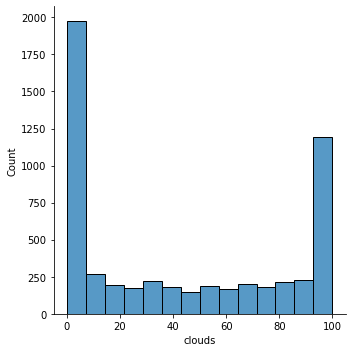

In [20]:
sns.displot(df['clouds']);

median:  33.0 % ; mean:  42.71 %
average clouds when no rain 33.9 %
average clouds when it is rainy 75.96 %


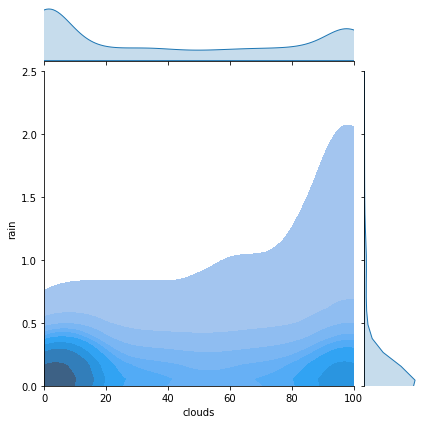

In [21]:
sns.jointplot(x=df['clouds'],y=df['rain'], kind = 'kde', fill = True, xlim=(0,100),  ylim=(0,2.5));
print("median: ", df['clouds'].median(), "%", "; mean: ", round(df['clouds'].mean(),2), "%")
print("average clouds when no rain", round (df[df['rain']==0]['clouds'].mean(),2), "%")
print("average clouds when it is rainy", round(df[df['rain']!=0]['clouds'].mean(),2), "%")

- **Strategy** We are going to fill the na in clouds with this values:

average clouds when no rain 33.9 %
average clouds when it is rainy 75.96 %


In [22]:
mask = df['clouds'].isna()
df[mask].index
for i in df[mask].index:
    if df.loc[i,'rain']==0:
        df.loc[i,'clouds'] = 33.9
    else:
        df.loc[i,'clouds'] = 75.96

### 1.6 - Forecasted convective rain 

In [23]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                    0
wind_speed                0
wind_deg                  0
rain                      0
convective              790
Direction N-S             0
Direction E-W             0
Tarifa_WindGust           0
Tarifa_Wind               0
Tarifa_WindDirection      0
Tarifa_Direction N-S      0
Tarifa_Direction E-W      0
delta_Wind                0
delta_N-S                 0
delta_E-W                 0
dtype: int64

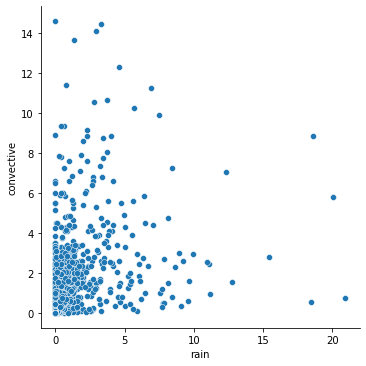

In [24]:
sns.relplot(x = df['rain'], y = df['convective']);

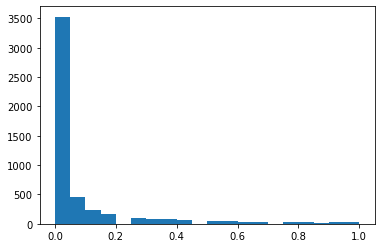

In [25]:
plt.hist(x= df['convective'], bins = 20, range=(0,1));

In [26]:
print('Convective mean value :', df['convective'].mean())
print('Rain mean value: ' , df['rain'].mean())

Convective mean value : 0.3436812353259879
Rain mean value:  0.21480259206574953


In [27]:
print('convective median value when no rain', df[df['rain']==0]['convective'].median())
print('convective median value when rain', df[df['rain']!=0]['convective'].median())

convective median value when no rain 0.0
convective median value when rain 0.625


In [28]:
aux = df[df['convective'].isna()]
print ('convective nan with no rain', aux[aux['rain']==0].shape[0])
print ('convective nan with rain', aux[aux['rain']!=0].shape[0])


convective nan with no rain 671
convective nan with rain 119


- **Strategy**

We dont find a clear linear relation between rain and convective (convective rain).
what we found is that when there rain = 0, convective rain median value is also 0.
Then...

WE can approximate the missing values of convective (rain) by:
-  **0 when rain is 0**
-  **0.625 (median value of convective rain when rain != 0 .**


In [29]:
mask = df['convective'].isna()

for i in df[mask].index:
    if df.loc[i,'rain']==0:
        df.loc[i,'convective'] = 0
    else:
        df.loc[i,'convective'] = 0.625

REVIEW AFTER DEPLOYING THE MODEL--> The objetive of the ML learning model is to make predictions based on current meteorological data obtained for the next 48hours by the data provider OpenWeatherData. After reviewing the forecast data, convective rain is not provided. Then, despite of all the work perfomed with the feature convective rain, we are going to make all the model training without that feature, as we are not going to be able to use it in the deployment of the model. 

In [30]:
df.isna().sum()

slice dt iso            0
lat                     0
lon                     0
temperature             0
dew_point               0
pressure                0
humidity                0
clouds                  0
wind_speed              0
wind_deg                0
rain                    0
convective              0
Direction N-S           0
Direction E-W           0
Tarifa_WindGust         0
Tarifa_Wind             0
Tarifa_WindDirection    0
Tarifa_Direction N-S    0
Tarifa_Direction E-W    0
delta_Wind              0
delta_N-S               0
delta_E-W               0
dtype: int64

Let s test if there is duplicates...

In [31]:
df.shape

(6327, 22)

In [32]:
df.drop_duplicates()

,slice dt iso,lat,lon,temperature,dew_point,pressure,humidity,clouds,wind_speed,wind_deg,...,Direction N-S,Direction E-W,Tarifa_WindGust,Tarifa_Wind,Tarifa_WindDirection,Tarifa_Direction N-S,Tarifa_Direction E-W,delta_Wind,delta_N-S,delta_E-W
0,2019-02-16 09:00:00,36.013158,-5.598892,13.79,11.13,1021.601,83.994,100.0,25.963871,95.202,...,-0.090667,0.995881,35.118709,17.624149,72.0,0.309017,0.951057,-8.339722,0.399684,-0.044825
1,2019-02-16 12:00:00,36.013158,-5.598892,13.81,11.16,1022.066,84.064,96.0,25.437090,93.856,...,-0.067249,0.997736,35.053915,21.835803,86.0,0.069756,0.997564,-3.601288,0.137006,-0.000172
2,2019-02-16 15:00:00,36.013158,-5.598892,13.82,11.15,1020.887,83.926,92.0,23.938390,93.883,...,-0.067719,0.997704,34.859531,20.539909,82.0,0.139173,0.990268,-3.398480,0.206892,-0.007436
3,2019-02-16 18:00:00,36.013158,-5.598892,13.77,11.27,1020.964,84.583,94.0,19.924360,95.812,...,-0.101265,0.994860,35.766656,23.326080,87.0,0.052336,0.998630,3.401720,0.153601,0.003770
4,2019-02-18 09:00:00,36.013158,-5.598892,12.90,10.63,1016.936,85.879,100.0,10.457859,82.105,...,0.137358,0.990521,24.103616,10.010776,88.0,0.034899,0.999391,-0.447083,-0.102459,0.008869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6322,2021-05-19 09:00:00,36.013158,-5.598892,23.05,12.91,1018.467,52.600,41.9,1.315980,231.962,...,-0.616184,-0.787602,6.933029,3.239733,249.0,-0.358368,-0.933580,1.923754,0.257816,-0.145978
6323,2021-05-19 12:00:00,36.013158,-5.598892,24.45,11.55,1018.233,44.200,28.7,4.089839,78.455,...,0.200138,0.979768,20.215936,12.829344,102.0,-0.207912,0.978148,8.739505,-0.408049,-0.001620
6324,2021-05-19 15:00:00,36.013158,-5.598892,22.65,12.45,1018.215,52.500,25.3,11.151810,68.753,...,0.362389,0.932027,28.768832,17.948123,74.0,0.275637,0.961262,6.796313,-0.086752,0.029235
6325,2021-05-19 18:00:00,36.013158,-5.598892,19.66,16.55,1018.845,82.600,21.5,11.254834,61.292,...,0.480346,0.877079,27.861707,17.818533,72.0,0.309017,0.951057,6.563700,-0.171329,0.073977


**No duplicates!!**

In [33]:
df.dtypes

slice dt iso            datetime64[ns]
lat                            float64
lon                            float64
temperature                    float64
dew_point                      float64
pressure                       float64
humidity                       float64
clouds                         float64
wind_speed                     float64
wind_deg                       float64
rain                           float64
convective                     float64
Direction N-S                  float64
Direction E-W                  float64
Tarifa_WindGust                float64
Tarifa_Wind                    float64
Tarifa_WindDirection           float64
Tarifa_Direction N-S           float64
Tarifa_Direction E-W           float64
delta_Wind                     float64
delta_N-S                      float64
delta_E-W                      float64
dtype: object

# 2 Machine Learning

In [34]:
# Function to divide dataframe into train and test

def train_test_division(features, target):
    features_train, features_test, target_train, target_test = train_test_split(features,target, random_state = 10)
    target_train = target_train.values.ravel()
    target_test = target_test.values.ravel()
    
    return features_train, features_test, target_train, target_test

In [35]:
# Function to calculate MAPE

def mean_absolute_percentage_error(y_true, y_pred): 
    return float(np.mean(np.abs((y_true - y_pred) / y_true)))

In [36]:
# Function to evaluate model errors

def evaluate(model, target_test, prediction):
    mse = round(mean_squared_error(target_test, prediction), 3)
    mae = round(mean_absolute_error(target_test, prediction), 3)
    mape = round(mean_absolute_percentage_error(target_test, prediction),2)
    ev = round(explained_variance_score(target_test, prediction), 2)
    new_row = {"model" : model , "mse": mse, "mae" : mae, "mape": mape, "ev" : ev}
    
    return new_row

In [37]:
def plot_metrics(metrics):
    
    fig, axes = plt.subplots(4,1,figsize=(10,10))
    fig.tight_layout()

    names = ['mse','mae','mape','ev']

    for i in range(0,len(names)):
        if names[i]!='ev':
            metrics_ordered = metrics.sort_values(by=names[i])
            clrs = ['grey' if (x > min(metrics_ordered[names[i]])) else 'green' for x in metrics_ordered[names[i]]]
        else:
            metrics_ordered = metrics.sort_values(by=names[i], ascending=False)
            clrs = ['grey' if (x < max(metrics_ordered[names[i]])) else 'green' for x in metrics_ordered[names[i]]]

        sns.barplot(x= metrics_ordered[names[i]],y = metrics_ordered['model'], ax = axes[i], palette='spring');
        axes[i].set_ylabel(names[i]);
        axes[i].set_xlabel(None)


In [38]:
# We re going to create a Dataframe to collect metric values

metrics = pd.DataFrame(columns = ("model", "mse", "mae","mape", "ev"))

## 2.1.-  Evaluation of openweathermap.org forecast model (baseline)

First step is to measure how good is the forecast model that for us is used as features, and it s going to be the model to challenge. 


In [39]:
target_baseline = df['Tarifa_Wind']
prediction_baseline = df['wind_speed']

In [40]:
metrics = metrics.append(evaluate("baseline", target_baseline,prediction_baseline), 
                         ignore_index=True)

metrics

,model,mse,mae,mape,ev
0,baseline,14.737,3.102,0.35,0.62


## 2.2 - Regressors  without further preprocesing

We are going to test the prediction ability of 4 regressors without any further preprocessing of the features. 
- Linnear Regressor
- KNeighbours
- Decission Tree
- Random Forest

In [41]:
df.columns

Index(['slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'humidity', 'clouds', 'wind_speed', 'wind_deg', 'rain', 'convective',
       'Direction N-S', 'Direction E-W', 'Tarifa_WindGust', 'Tarifa_Wind',
       'Tarifa_WindDirection', 'Tarifa_Direction N-S', 'Tarifa_Direction E-W',
       'delta_Wind', 'delta_N-S', 'delta_E-W'],
      dtype='object')

In [42]:
features = df.loc[:,['temperature', 'dew_point', 'pressure','humidity', 'clouds',
                     'wind_speed', 'rain','Direction N-S', 'Direction E-W']]

In [43]:
target = df.loc[:,['Tarifa_Wind']]

In [44]:
# Set up train and test

features_train, features_test, target_train, target_test = train_test_division(features, target)

In [45]:
# Loading naive models

lr = LinearRegression()
knr = KNeighborsRegressor()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

In [46]:
lr.fit(features_train,target_train)
prediction = lr.predict(features_test)

metrics = metrics.append(evaluate("lr", target_test, prediction), ignore_index=True)

In [47]:
knr.fit(features_train,target_train)
prediction = knr.predict(features_test)

metrics = metrics.append(evaluate("knr", target_test, prediction), ignore_index=True)

In [48]:
tree.fit(features_train,target_train)
prediction = tree.predict(features_test)

metrics = metrics.append(evaluate("tree", target_test, prediction), ignore_index=True)

In [49]:
forest.fit(features_train,target_train)
prediction = forest.predict(features_test)

metrics = metrics.append(evaluate("forest", target_test, prediction), ignore_index=True)

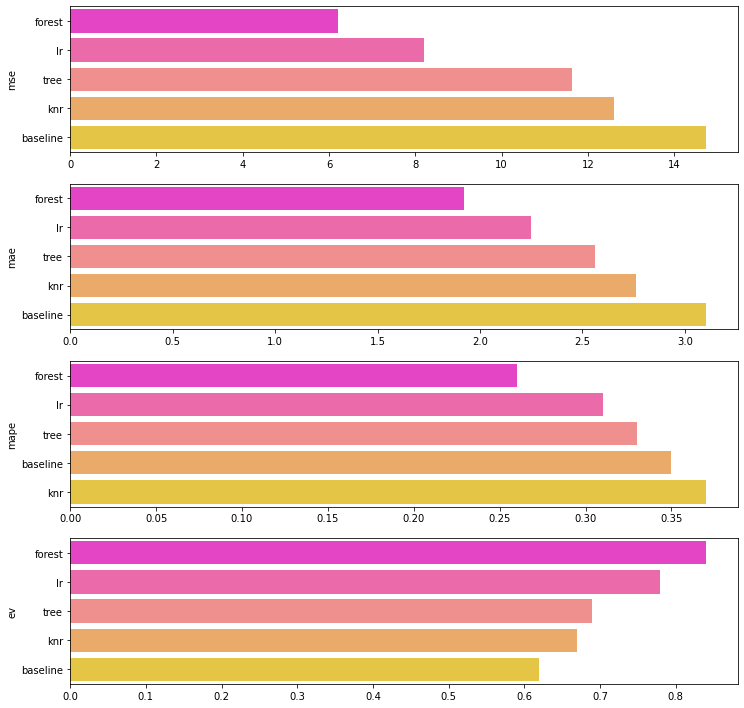

In [50]:
plot_metrics(metrics)

## 2.3 - Regressors with previous Data Standarization

We are going to test the same 4 regressors (Linnear Regressor,  KNeighbours, Decission Tree, Random Forest) doing a preprocessing of the features with an **Standard Scaler** to test if we can find any improvement in any of the regressors.

In [51]:
# Loading naive models

lr = LinearRegression()
knr = KNeighborsRegressor()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

In [52]:
# Scaler

scaler = StandardScaler()

features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [53]:
lr.fit(features_train,target_train)
prediction = lr.predict(features_test)

metrics = metrics.append(evaluate("lr + std", target_test, prediction), ignore_index=True)

In [54]:
knr.fit(features_train,target_train)
prediction = knr.predict(features_test)

metrics = metrics.append(evaluate("knr + std", target_test, prediction), ignore_index=True)

In [55]:
tree.fit(features_train,target_train)
prediction = tree.predict(features_test)

metrics = metrics.append(evaluate("tree + stdr", target_test, prediction), ignore_index=True)

In [56]:
forest.fit(features_train,target_train)
prediction = forest.predict(features_test)

metrics = metrics.append(evaluate("forest+ std", target_test, prediction), ignore_index=True)

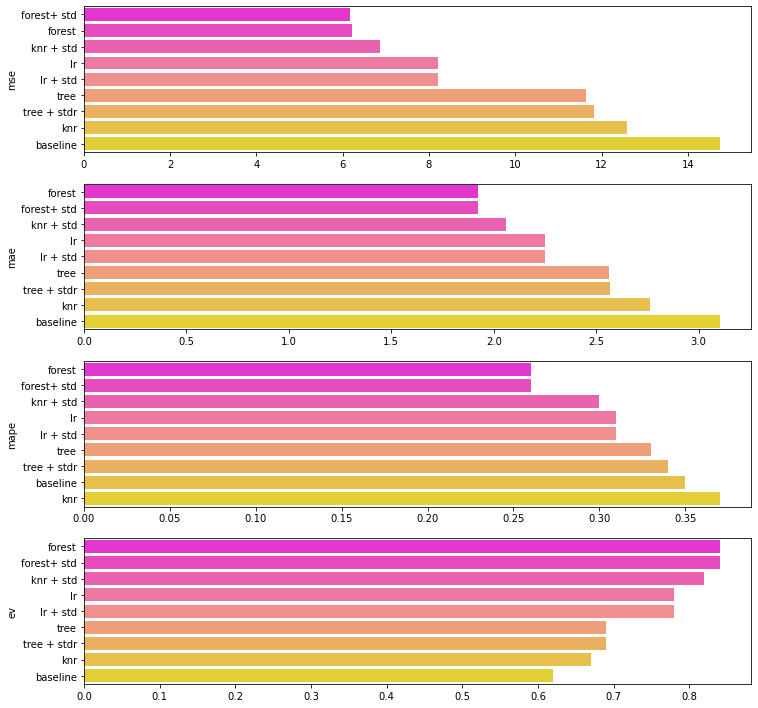

In [57]:
plot_metrics(metrics)

**We dont find any significant improvement in the best out of the 4 regressors (Random forest) perforiming a previous SandardScaler, having even worse results in some of the metrics. Random Forest is a tree-based model and we can see that the euclidean disntance is not affecting in its performace, as it is happening for instance in in K-Neighbours where euclidean distance hence normalization is key on the performance of the algorithm.**. 

**Because of we dont have any significant improvement with Standard Scaling preprocessing and that requires further computation, our chosen model now on will be Random Forest without Standard Scaling.**

# 2.5 - Adding lags to features

We are going to check how adding lags can affect to the metrics in our model, becasuse the conditions in the morning can affect the conditions in the afternoon. Let s do a first shot. 

In [58]:
df['wind_speed-1']=df['wind_speed'].shift(1)
df['wind_speed-2']=df['wind_speed'].shift(2)
df['wind_deg-1']=df['wind_deg'].shift(1)
df['wind_deg-2']=df['wind_deg'].shift(2)
df['temperature-1']=df['temperature'].shift(1)
df['temperature-2']=df['temperature'].shift(2)

df.dropna(inplace=True)

df.reset_index(drop=True, inplace=True)
df.head()

,slice dt iso,lat,lon,temperature,dew_point,pressure,humidity,clouds,wind_speed,wind_deg,...,Tarifa_Direction E-W,delta_Wind,delta_N-S,delta_E-W,wind_speed-1,wind_speed-2,wind_deg-1,wind_deg-2,temperature-1,temperature-2
0,2019-02-16 15:00:00,36.013158,-5.598892,13.82,11.15,1020.887,83.926,92.0,23.938390,93.883,...,0.990268,-3.398480,0.206892,-0.007436,25.437090,25.963871,93.856,95.202,13.81,13.79
1,2019-02-16 18:00:00,36.013158,-5.598892,13.77,11.27,1020.964,84.583,94.0,19.924360,95.812,...,0.998630,3.401720,0.153601,0.003770,23.938390,25.437090,93.883,93.856,13.82,13.81
2,2019-02-18 09:00:00,36.013158,-5.598892,12.90,10.63,1016.936,85.879,100.0,10.457859,82.105,...,0.999391,-0.447083,-0.102459,0.008869,19.924360,23.938390,95.812,93.883,13.77,13.82
3,2019-02-19 09:00:00,36.013158,-5.598892,12.68,9.45,1019.711,81.056,3.0,4.634115,55.910,...,0.766044,1.100213,0.082293,-0.062114,10.457859,19.924360,82.105,95.812,12.90,13.77
4,2019-02-19 12:00:00,36.013158,-5.598892,14.08,9.95,1019.695,75.970,1.0,9.672548,97.588,...,0.991243,2.379260,0.000000,0.000000,4.634115,10.457859,55.910,82.105,12.68,12.90


In [59]:
features = df.loc[:,['temperature', 'dew_point', 'pressure','humidity', 'clouds',
                     'wind_speed', 'rain', 'convective','Direction N-S', 'Direction E-W', 
                     'wind_speed-1', 'wind_speed-2','wind_deg-1', 'wind_deg-2', 'temperature-1', 'temperature-2']]
target = df.loc[:,['Tarifa_Wind']]

In [60]:
# Setting up train / test
features_train, features_test, target_train, target_test = train_test_division(features,target)

# Loading naive models
forest = RandomForestRegressor()

In [61]:
# Model fit and predict

forest.fit(features_train,target_train)
prediction = forest.predict(features_test)

metrics = metrics.append(evaluate("forest + lags", target_test, prediction), ignore_index=True)

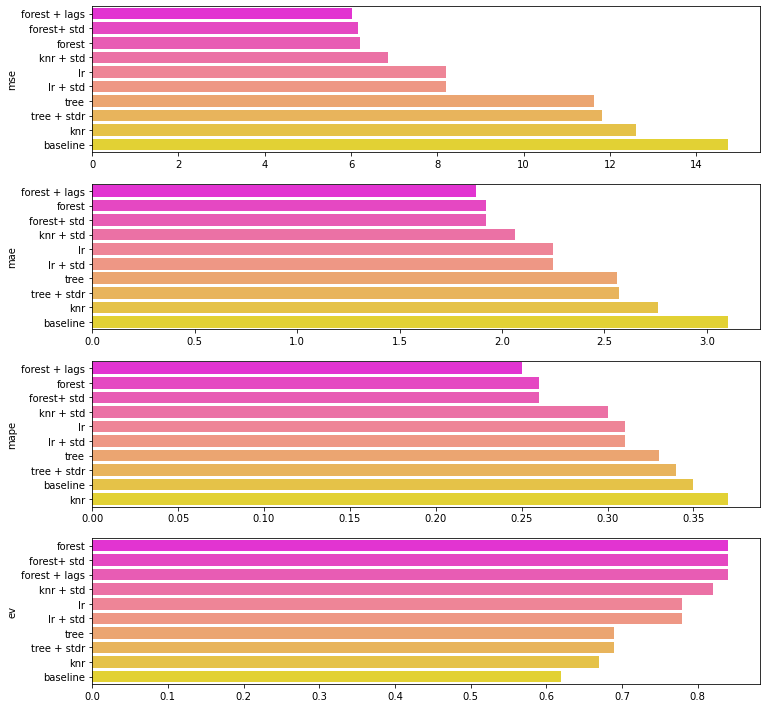

In [62]:
plot_metrics(metrics)

Using lags features of the most significact features(wind speed, direction and temperature) is improving the 3 out of 4 metrics, so definitvely helps the model its prediction capacity.

## 2.6.- Adding seasonal features

It is observed that there is a dayly seasonalty effect in the wind behavivour, probably due to strong sun incidence in the land what provoke higher temperatures and thermal wind currents from sea to land. To allow our model to interprete that seasonality we are going to add dayly seasonal variables. 

We are going to make use of the datestamps hours to create a sinoidal and cosinoidal functions with 24 h period to allow the ML to find determine this seasonal behaveour (if any). 

In [63]:
for i in df.index:
    df.loc[i,'hour'] = df.loc[i,'slice dt iso'].hour

In [64]:
period = 24

for i in df.index:
    df.loc[i,'s-24'] = np.sin(2*np.pi*df.loc[i,'hour']/period)
    df.loc[i,'c-24'] = np.cos(2*np.pi*df.loc[i,'hour']/period)

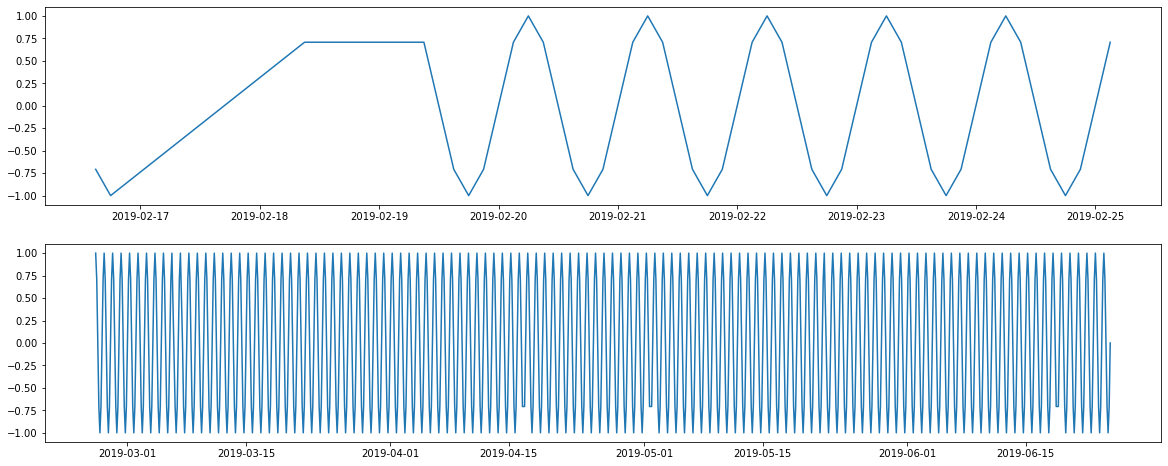

In [65]:
figure, axes = plt.subplots(2,1,figsize=(20,8))

axes[0].plot(df['slice dt iso'][0:50],df['s-24'][0:50]);
axes[1].plot(df['slice dt iso'][50:1000],df['s-24'][50:1000]);

In the previous graph we can check that the if seasonal features are properly created. 
We can see that there are some anomalies due to some missing registers in the dataframe, but the function periodicity is 24 h, assigning a value depends on the hour of the day of the data register.

In [66]:
# Selecting features and target columns

df.columns

Index(['slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'humidity', 'clouds', 'wind_speed', 'wind_deg', 'rain', 'convective',
       'Direction N-S', 'Direction E-W', 'Tarifa_WindGust', 'Tarifa_Wind',
       'Tarifa_WindDirection', 'Tarifa_Direction N-S', 'Tarifa_Direction E-W',
       'delta_Wind', 'delta_N-S', 'delta_E-W', 'wind_speed-1', 'wind_speed-2',
       'wind_deg-1', 'wind_deg-2', 'temperature-1', 'temperature-2', 'hour',
       's-24', 'c-24'],
      dtype='object')

In [67]:
features = df.loc[:,['temperature', 'dew_point', 'pressure','humidity', 'clouds',
                     'wind_speed', 'rain','Direction N-S', 'Direction E-W',
                     's-24', 'c-24']]
target = df.loc[:,['Tarifa_Wind']]

In [68]:
# Setting up train / test
features_train, features_test, target_train, target_test = train_test_division(features,target)

# Loading naive models
forest = RandomForestRegressor()

In [69]:
forest.fit(features_train,target_train)
prediction = forest.predict(features_test)

metrics = metrics.append(evaluate("forest + seasonal feat", target_test, prediction), ignore_index=True)

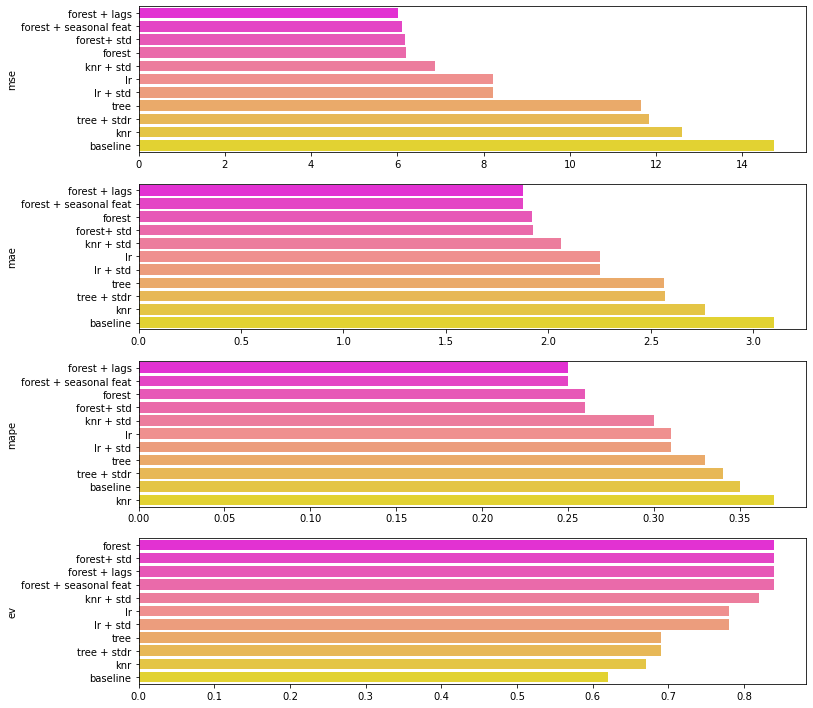

In [70]:
plot_metrics(metrics)

Adding daily seasonal features also improve in 3 out of 4 metrics the behaviour of the random forest method, allowing the model to predict according to daily patterns of the wind deviation behaviours (for instance during mornings wind forcast can be underestimated and in the eveningns can be overstimated) 

**REVIEW AFTER MODEL DEPLOYMENT Adding lags is an issue as imply some NAN (in the first rows of the dataframe). This issue in addition that the model behaves similar or even better just with seosonal features, lags are not gonna be used in the selected model for production**. 

## 2.6 - Hyperparamters optimization with GridSeachCV

Let s try to optimize the hyperparameters of the random forest model (we are going to keep the lags and seasonal in the features as they brough good results!)

In [71]:
features = df.loc[:,['temperature', 'dew_point', 'pressure','humidity', 'clouds',
                     'wind_speed', 'rain','Direction N-S', 'Direction E-W',
                     's-24', 'c-24']]
target = df.loc[:,['Tarifa_Wind']]

In [72]:
# Setting up train / test
features_train, features_test, target_train, target_test = train_test_division(features,target)

# Loading naive models
forest = RandomForestRegressor()

In [73]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
%%time

# Let s play with two important parameters to see if we can obtain a further improvement.

param_grid = {'n_estimators' : [10, 100,200, 300],
              'max_depth' : [None, 5, 10, 15, 20]}

cv = GridSearchCV(forest, param_grid, n_jobs=4, scoring='neg_mean_squared_error')

cv.fit(features_train, target_train)

CPU times: user 4.45 s, sys: 112 ms, total: 4.56 s
Wall time: 1min 11s


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'n_estimators': [10, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [75]:
cv.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [76]:
prediction = cv.best_estimator_.predict(features_test)

metrics = metrics.append(evaluate("forest + seasonals + paramsCV", target_test, prediction), ignore_index=True)

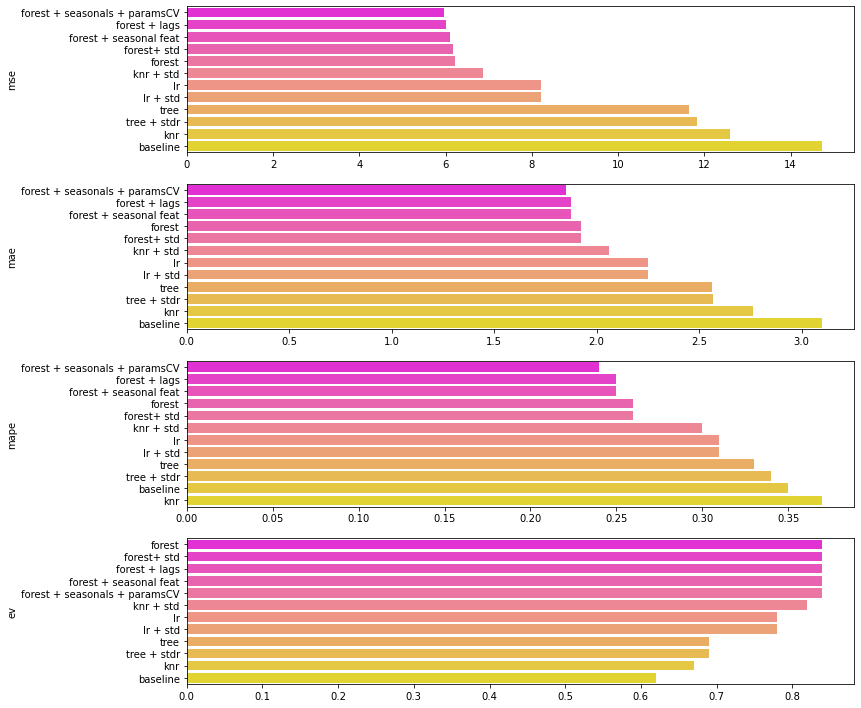

In [77]:
plot_metrics(metrics)

We obitain this values as the optimum {'max_depth': 20, 'n_estimators': 200} although the improvement is quite not super notorious, probably because we are already the improvemnet margin is already quite small. 

# 3 Save the optimized model for use it in deployment

In [78]:
# Save the best estimator for usage in the app

filename = 'Data/model/windpredictor.sav'
pickle.dump(cv.best_estimator_, open(filename, 'wb'))

In [79]:
# We can later import the model with this line:
# filename = 'windpredictor.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

# 4 Annex . Dataset for Tableau Forecast visualization

In [80]:
loaded_model = pickle.load(open(filename, 'rb'))

In [81]:
loaded_model.predict

<bound method ForestRegressor.predict of RandomForestRegressor(max_depth=20, n_estimators=200)>

In [82]:
df['prediction'] = loaded_model.predict(features)

In [83]:
df.dtypes

slice dt iso     datetime64[ns]
lat                     float64
lon                     float64
temperature             float64
dew_point               float64
                      ...      
temperature-2           float64
hour                    float64
s-24                    float64
c-24                    float64
prediction              float64
Length: 32, dtype: object

In [84]:
df['mae_prediction'] =abs(df['prediction']-df['Tarifa_Wind'])
df['mae_weather_forecast']=abs(df['wind_speed']-df['Tarifa_Wind'])

In [85]:
df.loc[features_train.index,'label']='train'
df.loc[features_test.index,'label']='test'

In [86]:
df

,slice dt iso,lat,lon,temperature,dew_point,pressure,humidity,clouds,wind_speed,wind_deg,...,wind_deg-2,temperature-1,temperature-2,hour,s-24,c-24,prediction,mae_prediction,mae_weather_forecast,label
0,2019-02-16 15:00:00,36.013158,-5.598892,13.82,11.15,1020.887,83.926,92.0,23.938390,93.883,...,95.202,13.81,13.79,15.0,-7.071068e-01,-7.071068e-01,21.411506,0.871596,3.398480,train
1,2019-02-16 18:00:00,36.013158,-5.598892,13.77,11.27,1020.964,84.583,94.0,19.924360,95.812,...,93.856,13.82,13.81,18.0,-1.000000e+00,-1.836970e-16,21.062200,2.263880,3.401720,test
2,2019-02-18 09:00:00,36.013158,-5.598892,12.90,10.63,1016.936,85.879,100.0,10.457859,82.105,...,93.883,13.77,13.82,9.0,7.071068e-01,-7.071068e-01,11.613772,1.602996,0.447083,train
3,2019-02-19 09:00:00,36.013158,-5.598892,12.68,9.45,1019.711,81.056,3.0,4.634115,55.910,...,95.812,12.90,13.77,9.0,7.071068e-01,-7.071068e-01,5.864522,0.130194,1.100213,train
4,2019-02-19 12:00:00,36.013158,-5.598892,14.08,9.95,1019.695,75.970,1.0,9.672548,97.588,...,82.105,12.68,12.90,12.0,1.224647e-16,-1.000000e+00,12.712930,0.661122,2.379260,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6320,2021-05-19 09:00:00,36.013158,-5.598892,23.05,12.91,1018.467,52.600,41.9,1.315980,231.962,...,270.388,18.22,17.88,9.0,7.071068e-01,-7.071068e-01,3.793392,0.553658,1.923754,train
6321,2021-05-19 12:00:00,36.013158,-5.598892,24.45,11.55,1018.233,44.200,28.7,4.089839,78.455,...,266.713,23.05,18.22,12.0,1.224647e-16,-1.000000e+00,10.568380,2.260964,8.739505,train
6322,2021-05-19 15:00:00,36.013158,-5.598892,22.65,12.45,1018.215,52.500,25.3,11.151810,68.753,...,231.962,24.45,23.05,15.0,-7.071068e-01,-7.071068e-01,16.114922,1.833200,6.796313,train
6323,2021-05-19 18:00:00,36.013158,-5.598892,19.66,16.55,1018.845,82.600,21.5,11.254834,61.292,...,78.455,22.65,24.45,18.0,-1.000000e+00,-1.836970e-16,16.503274,1.315259,6.563700,train


In [87]:
df.to_csv('Data/data4tableau.csv', index=False)